In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv('datasets/big_mart_sales.csv')
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [60]:
df.Item_Fat_Content.unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [63]:
df.replace(to_replace = ['low fat', 'LF'], value = 'Low Fat', inplace = True)

In [65]:
df.replace(to_replace = ['reg'], value = 'Regular', inplace = True)

In [66]:
df.Item_Fat_Content.unique()

array(['Low Fat', 'Regular'], dtype=object)

In [67]:
y = df['Item_Outlet_Sales']
X = df.drop('Item_Outlet_Sales', axis = 1)

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 54)
len(X_train), len(X_test),  len(y_train), len(y_test)

(6818, 1705, 6818, 1705)

In [69]:
df.shape

(8523, 12)

<Axes: xlabel='Item_Weight', ylabel='Count'>

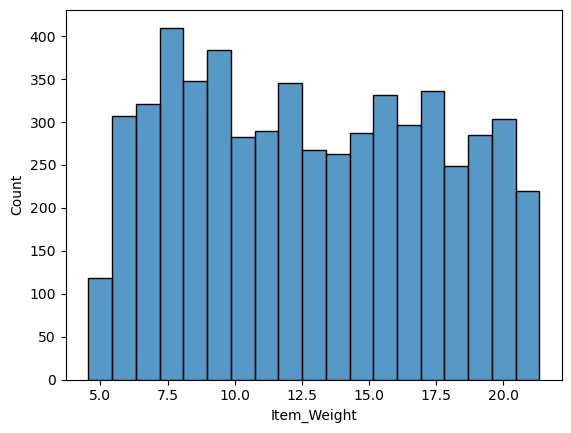

In [70]:
import seaborn as sns 
# sns.boxplot(x = 'Item_Weight', data = X_train)                    # No outliers
# sns.boxplot(x = 'Item_Visibility', data = X_train)                # Outliers exist
# sns.boxplot(x = 'Item_MRP', data = X_train)                       # No outliers
# sns.boxplot(x = 'Outlet_Establishment_Year', data = X_train)      # No outliers
sns.histplot(x = 'Item_Weight', data = X_train)

<Axes: xlabel='Outlet_Establishment_Year', ylabel='Count'>

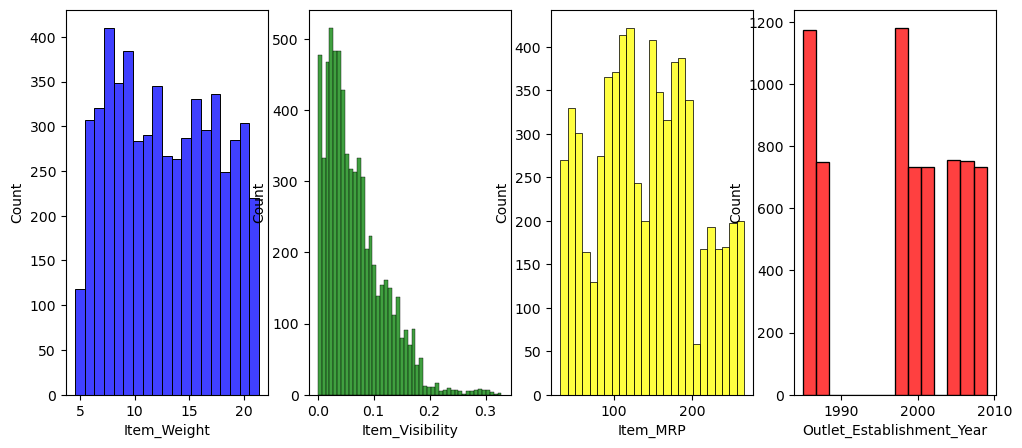

In [71]:
import matplotlib.pyplot as plt
fig , (ax1, ax2, ax3, ax4) = plt.subplots(nrows = 1, ncols = 4, figsize = (12,5))
sns.histplot(x = 'Item_Weight', data = X_train, color = 'blue', ax = ax1)
sns.histplot(x = 'Item_Visibility', data = X_train, color = 'green', ax = ax2)
sns.histplot(x = 'Item_MRP', data = X_train, color = 'yellow', ax = ax3)
sns.histplot(x = 'Outlet_Establishment_Year', data = X_train, color = 'red', ax = ax4)

<Axes: xlabel='Outlet_Establishment_Year'>

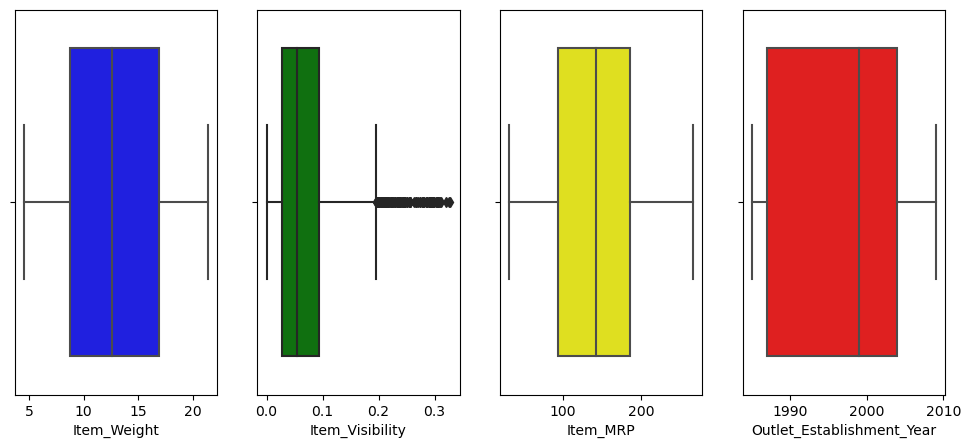

In [72]:
import matplotlib.pyplot as plt
fig , (ax1, ax2, ax3, ax4) = plt.subplots(nrows = 1, ncols = 4, figsize = (12,5))
sns.boxplot(x = 'Item_Weight', data = X_train, color = 'blue', ax = ax1)
sns.boxplot(x = 'Item_Visibility', data = X_train, color = 'green', ax = ax2)
sns.boxplot(x = 'Item_MRP', data = X_train, color = 'yellow', ax = ax3)
sns.boxplot(x = 'Outlet_Establishment_Year', data = X_train, color = 'red', ax = ax4)

<Axes: xlabel='Outlet_Establishment_Year', ylabel='Count'>

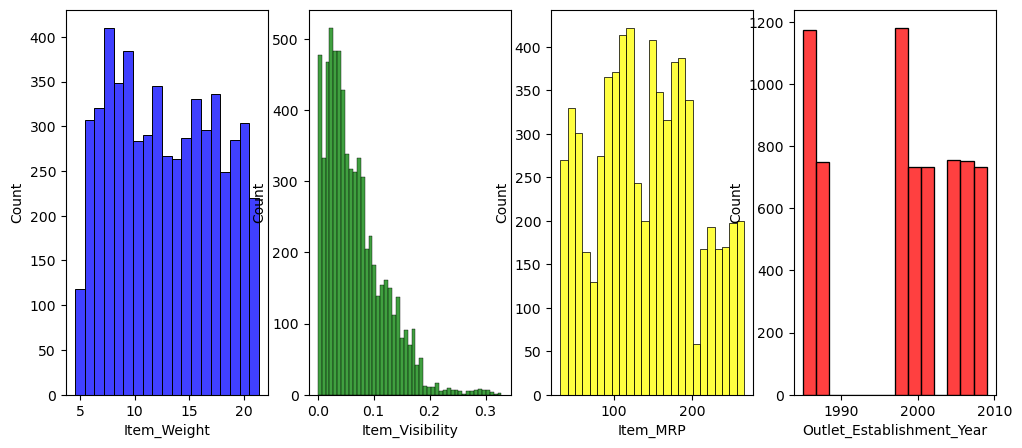

In [73]:
mu = X_train.Item_Visibility.mean()
sigma = X_train.Item_Visibility.std()
import matplotlib.pyplot as plt
fig , (ax1, ax2, ax3, ax4) = plt.subplots(nrows = 1, ncols = 4, figsize = (12,5))
sns.histplot(x = 'Item_Weight', data = X_train, color = 'blue', ax = ax1)
sns.histplot(x = 'Item_Visibility', data = X_train, color = 'green', ax = ax2)

sns.histplot(x = 'Item_MRP', data = X_train, color = 'yellow', ax = ax3)
sns.histplot(x = 'Outlet_Establishment_Year', data = X_train, color = 'red', ax = ax4)


In [74]:
X_train.isna().sum()

Item_Identifier                 0
Item_Weight                  1174
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1931
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

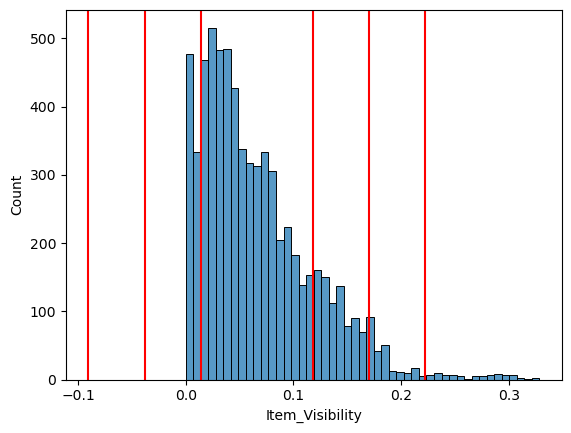

In [75]:
sns.histplot(x = 'Item_Visibility', data = X_train)
for i in [-3, -2, -1, 1,2,3]:
    plt.axvline(mu+i*sigma, color = 'red')
   

In [76]:
q1 = X_train.Item_Visibility.quantile(.25)
q3 = X_train.Item_Visibility.quantile(.75)
iqr = q3-q1
upper_limit = q3 + iqr*1.5
lower_limit = q1 - iqr*1.5
print(lower_limit)
print(upper_limit)

-0.07442796875000002
0.19547432325000003


In [77]:
X_train['Item_Visibility'] = np.where((X_train['Item_Visibility'] < lower_limit), lower_limit, (np.where(X_train['Item_Visibility'] > upper_limit, upper_limit, X_train['Item_Visibility'])))

<Axes: xlabel='Item_Visibility'>

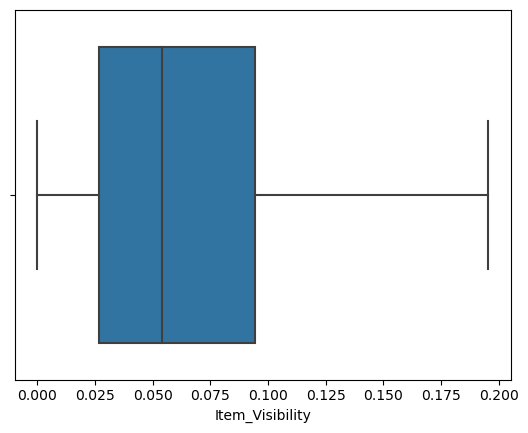

In [78]:
sns.boxplot(x = 'Item_Visibility', data = X_train)

In [79]:
X_train#.info()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
1956,DRO35,13.850,Low Fat,0.034624,Hard Drinks,115.0492,OUT049,1999,Medium,Tier 1,Supermarket Type1
4817,FDN15,17.500,Low Fat,0.016720,Meat,139.9180,OUT013,1987,High,Tier 3,Supermarket Type1
7804,DRM47,9.300,Low Fat,0.073288,Hard Drinks,189.1846,OUT010,1998,NaN,Tier 3,Grocery Store
7583,FDS59,14.800,Regular,0.043885,Breads,108.7570,OUT035,2004,Small,Tier 2,Supermarket Type1
1057,FDT28,13.300,Low Fat,0.063665,Frozen Foods,151.6708,OUT049,1999,Medium,Tier 1,Supermarket Type1
...,...,...,...,...,...,...,...,...,...,...,...
7480,FDB28,6.615,Low Fat,0.093914,Dairy,198.7426,OUT017,2007,NaN,Tier 2,Supermarket Type1
5143,FDI02,15.700,Regular,0.114565,Canned,112.0202,OUT046,1997,Small,Tier 1,Supermarket Type1
898,FDR27,15.100,Regular,0.096644,Meat,131.9942,OUT017,2007,NaN,Tier 2,Supermarket Type1
7493,FDT24,12.350,Regular,0.185824,Baking Goods,78.5328,OUT035,2004,Small,Tier 2,Supermarket Type1


In [80]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6818 entries, 1956 to 7279
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            6818 non-null   object 
 1   Item_Weight                5644 non-null   float64
 2   Item_Fat_Content           6818 non-null   object 
 3   Item_Visibility            6818 non-null   float64
 4   Item_Type                  6818 non-null   object 
 5   Item_MRP                   6818 non-null   float64
 6   Outlet_Identifier          6818 non-null   object 
 7   Outlet_Establishment_Year  6818 non-null   int64  
 8   Outlet_Size                4887 non-null   object 
 9   Outlet_Location_Type       6818 non-null   object 
 10  Outlet_Type                6818 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 639.2+ KB


In [90]:
X_train.isna().mean()*100

Item_Identifier               0.000000
Item_Weight                  17.219126
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.322089
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
dtype: float64

<Axes: xlabel='Outlet_Size', ylabel='Count'>

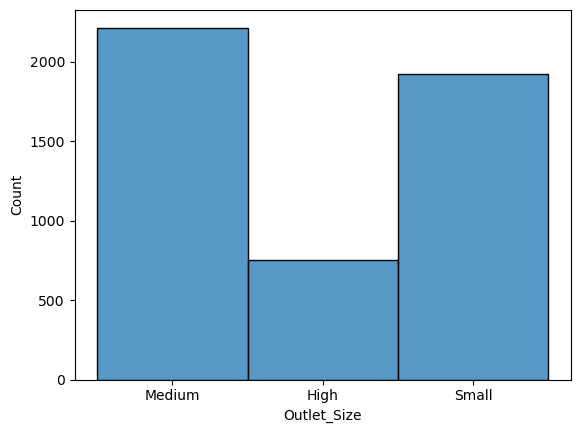

In [99]:
sns.histplot(x = 'Outlet_Size', data = X_train)

In [88]:
X_train.shape

(6818, 11)

In [94]:
# X_train.Item_Identifier.value_counts()            # Nominal
# X_train.Item_Fat_Content.unique()                 # Nominal
# X_train.Item_Type.unique()                        # Nominal
# X_train.Outlet_Identifier.unique()                # Nominal
# X_train.Outlet_Size.unique()                      # Ordinal
# X_train.Outlet_Location_Type.unique()             # Ordinal
# X_train.Outlet_Type.unique()                        # Nominal

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [106]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler
pipe1 = Pipeline(steps = 
               [
                   ('siME', SimpleImputer(missing_values = np.nan, strategy = 'mean'))
               ])
pipe2 = Pipeline(steps = 
               [
                   ('ohe', OneHotEncoder(drop = 'first', dtype = np.int32))
               ])
pipe3 = Pipeline(steps = 
               [
                   ('siMF', SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')),
                   ('oe', OrdinalEncoder(categories = [['Small', 'Medium', 'High'], ['Tier 1', 'Tier 3', 'Tier 2']]) )
               ])

In [107]:
from sklearn.compose import ColumnTransformer
cal_trans = ColumnTransformer(transformers = 
                             [
                                 ('Im', pipe1, [1]),
                                 ('ohe', pipe2, [0, 2, 3, 4, 5, 6, 7, 10]),
                                 ('oe', pipe3, [8,9])
                             ])

In [113]:
from sklearn.linear_model import LinearRegression
model = Pipeline(steps =
                [
                    ('preprocessing', cal_trans),
                    ('sc', StandardScaler(with_mean=False)),
                    ('estimator', LinearRegression())
                ])

In [109]:
model

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('Im',
                                                  Pipeline(steps=[('siME',
                                                                   SimpleImputer())]),
                                                  [1]),
                                                 ('ohe',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 dtype=<class 'numpy.int32'>))]),
                                                  [0, 2, 3, 4, 5, 6, 7, 10]),
                                                 ('oe',
                                                  Pipeline(steps=[('siMF',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('oe',
                                                                   OrdinalEncoder(categories=[['Small',
                                                                                               'Medium',
                                                                                               'High'],
                                                                                              ['Tier '
                                                                                               '1',
                                                                                               'Tier '
                                                                                               '3',
                                                                                               'Tier '
                                                                                               '2']]))]),
                                                  [8, 9])])),
                ('sc', StandardScaler()), ('estimator', LinearRegression())])

In [114]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('Im',
                                                  Pipeline(steps=[('siME',
                                                                   SimpleImputer())]),
                                                  [1]),
                                                 ('ohe',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 dtype=<class 'numpy.int32'>))]),
                                                  [0, 2, 3, 4, 5, 6, 7, 10]),
                                                 ('oe',
                                                  Pipeline(steps=[('siMF',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('oe',
                                                                   OrdinalEncoder(categories=[['Small',
                                                                                               'Medium',
                                                                                               'High'],
                                                                                              ['Tier '
                                                                                               '1',
                                                                                               'Tier '
                                                                                               '3',
                                                                                               'Tier '
                                                                                               '2']]))]),
                                                  [8, 9])])),
                ('sc', StandardScaler(with_mean=False)),
                ('estimator', LinearRegression())])

In [116]:
model.predict(X_test)

ValueError: Found unknown categories ['FDQ60', 'NCX53', 'FDN52', 'FDC23'] in column 0 during transform